# 1. Risk to Return Ratio.

In any investment, we expect to make a return more than our intial investment. But in any investment, there is always risk involved, so how do we compare different investment with similar returns on average, but with different risk?

To do that, we can compares the average difference divided by standard deviation. a higher value of this means higher return for given amount of risk.

The description/concept above are called Sharpe ratio, i recommend you to find out the detailed version of Sharpe Ratio is.

Lets get started.

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock_data = pd.read_csv('datasets/stock_data.csv', parse_dates=['Date'], index_col=['Date']).dropna()
benchmark_data = pd.read_csv('datasets/benchmark_data.csv',  parse_dates=['Date'], index_col=['Date']).dropna()

## 2. The Data

Take a look at the datasets we just loaded, how many columns and row does it have.

In [2]:
# Display summary for stock_data
print('Stocks\n')
stock_data.info()

# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()


Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


## 3. Summary and Plot of FB and AMZN
Before we compare it to our benchmark (SPY500), lets plot the the each company individualy so we understand better.

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


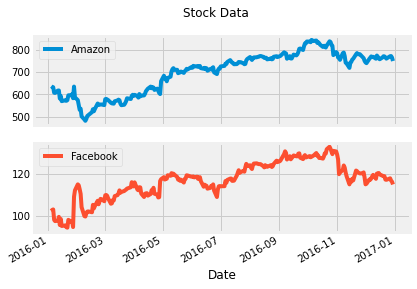

In [3]:
# visualize the stock_data
stock_data.plot(subplots=True, title='Stock Data')


# summarize the stock_data
stock_data.describe()


## 4. Summary and Plot of SPY500
Also take a look at the S&P 500 data, our benchmark.

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


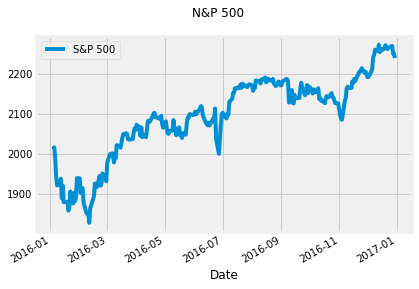

In [4]:
# plot the benchmark_data
benchmark_data.plot(subplots=True, title='N&P 500')


# summarize the benchmark_data
benchmark_data.describe()


## 5. The inputs for the Sharpe Ratio: Starting with Daily Stock Returns
Let's calculate the difference in returns between the two companies.

The values in our data is historical vlue of investment not return, to calculate return we need to calculate the percent change in certain date to the next day, also take a look at summary statistics because we need the mean of the difference to caculate the risk ratio.


,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


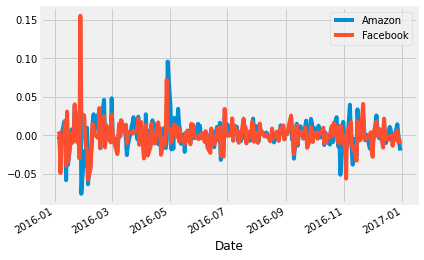

In [5]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot()

# summarize the daily returns
stock_returns.describe()

In [6]:
stock_returns.tail()

,Amazon,Facebook
Date,,
2016-12-23,-0.007503,-0.001107
2016-12-27,0.014213,0.006310
2016-12-28,0.000946,-0.009237
2016-12-29,-0.009040,-0.004875
2016-12-30,-0.019970,-0.011173


## 6. Daily S&P 500 returns
Repeat previous process for SPY500 data.

,S&P 500
count,251.000000
mean,0.000458
std,0.008205
min,-0.035920
25%,-0.002949
50%,0.000205
75%,0.004497
max,0.024760


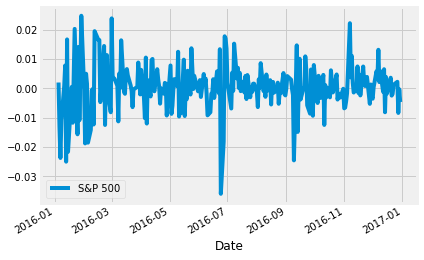

In [7]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data.pct_change()

# plot the daily returns
sp_returns.plot()


# summarize the daily returns
sp_returns.describe()


In [8]:
sp_returns.tail()

,S&P 500
Date,
2016-12-23,0.001252
2016-12-27,0.002248
2016-12-28,-0.008357
2016-12-29,-0.000293
2016-12-30,-0.004637


## 7. Calculating Excess Returns for Amazon and Facebook vs. S&P 500
Calculate the relative performance of FB & AMZN vs SPY500. to do this, we will substract the value of difference in our benchmark from the FB and AMZN differences.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


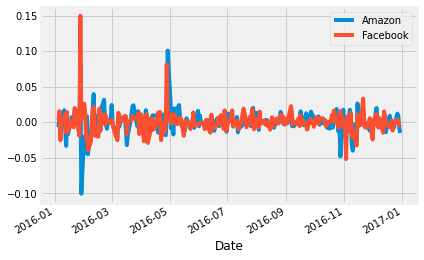

In [9]:
# calculate the difference in daily returns
excess_returns = excess_returns = stock_returns.sub(sp_returns['S&P 500'], axis=0)

# plot the excess_returns
excess_returns.plot()


# summarize the excess_returns
excess_returns.describe()


In [10]:
excess_returns.tail()

,Amazon,Facebook
Date,,
2016-12-23,-0.008755,-0.002359
2016-12-27,0.011964,0.004062
2016-12-28,0.009303,-0.000880
2016-12-29,-0.008747,-0.004582
2016-12-30,-0.015333,-0.006536


## 8. The Risk/Return Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500
Now we can calculate the risk/return ratio. First, get the mean of our calculated excess return over the year(all across the data).
Then, plot it to see the return difference individualy compared to SPY500.

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

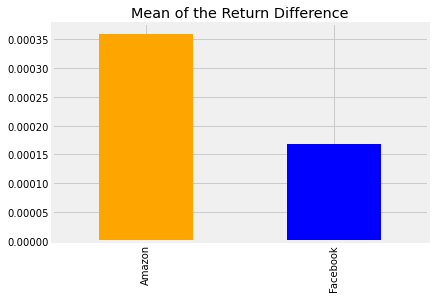

In [11]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot(title='Mean of the Return Difference', kind='bar', color=['orange', 'b'])


## 9. The Risk/Return Ratio, Step 2: Standard Deviation of the Return Difference
Theres some quite substantial amount difference of average daily returns between the two companies.

Next, calculate the standard deviation of our excess returns. this will be the amount of risk an investment implies compared to SPY500.

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

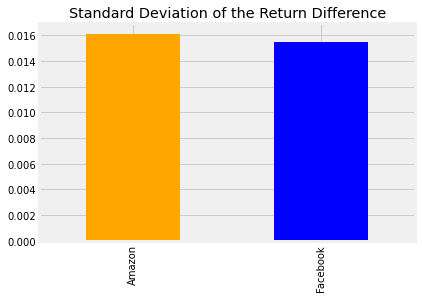

In [12]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot(title='Standard Deviation of the Return Difference', kind='bar', color=['orange', 'b'])


## 10. Putting it all together
Now we just need to calculate the ratio of our average returns and standard deviation returns, simply by dividing the average by standard deviation, we will have our dialy risk/return ratio. 

<AxesSubplot:title={'center':'Daily Risk/Return Ratio: Stocks vs S&P 500'}>

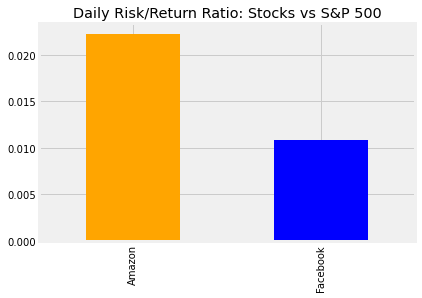

In [13]:
# calculate the daily sharpe ratio
daily_ratio = avg_excess_return.div(sd_excess_return)
daily_ratio.plot(title='Daily Risk/Return Ratio: Stocks vs S&P 500', kind='bar', color=['orange', 'b'])

In [14]:
print('Amazon Daily Risk/Return Ratio :'+str(daily_sharpe_ratio[0]))
print('Facebook Daily Risk/Return Ratio :'+str(daily_sharpe_ratio[1]))

NameError: name 'daily_sharpe_ratio' is not defined

To adjust the ratio, multiply the daily ratio by the squareroot of number of trading day (in this case 252 days), then we have annual ratio.

In [ ]:
# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_ratio = daily_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_ratio.plot(title='Annualized Risk/Return Ratio: Stocks vs S&P 500', kind='bar', color=['orange', 'b'])

print('Amazon Annual Risk Ratio :'+str(daily_sharpe_ratio[0]))
print('Facebook Annual Risk Ratio :'+str(daily_sharpe_ratio[1]))

## 11. Conclusion

Which investment we should go for? Amazon had a Ratio twice as high as Facebook, this means investment in Amazon likely to return twice as much compare to the SPY500 for each unit of risk an investor would assume, in other words, investment in amazon is more attractive.

The difference was mostly driven by differences in return rather than risk between the two companies. The risk on amazon over FB(measured by standard deviation) was only slightly higher that the higher Risk/Return ratio for amazon end up higher mainly due to higher average return for Amazon, in short both companies have almost the same risk but amazon return double the investment.